In [27]:
%matplotlib inline

import os
import pandas as pd

def load_airbnb_data():
    csv_path = os.path.join('BristolAirbnbListings.csv')
    return pd.read_csv(csv_path, index_col=0)


data = load_airbnb_data()
data.head()

,name,host_id,host_name,neighbourhood,postcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
70820,City View - Sarah's double room.,360195,Sarah,Windmill Hill,BS3 4,51.439942,-2.591726,Townhouse,Private room,2,1,1,1,27,4,130,2018-09-28,2.10,96,10,9,10,10.0,10.0,10.0,5,44
117122,City Centre - Waterside Retreat,591555,Marcus,Clifton,BS8 4UJ,51.450512,-2.610536,Apartment,Private room,4,2,1,2,65,1,126,2018-10-28,1.40,99,10,10,10,10.0,10.0,10.0,1,360
146407,Sunny Central Artist Cottage (Dbl),708175,Orla,Southville,BS3,51.441308,-2.602706,Townhouse,Private room,3,1,1,2,38,2,57,2018-09-12,0.76,91,9,8,9,10.0,9.0,9.0,2,46
176306,The White Room - Central Bristol Art House Ga...,708175,Orla,Bedminster,NaN,51.441006,-2.601208,Townhouse,Private room,2,1,1,1,35,2,30,2018-10-31,0.41,95,9,9,10,10.0,9.0,9.0,2,57
220956,"Light, Modern, 1st Floor Apartment.",1145941,Stephen,Bedminster,England,51.438517,-2.601421,Apartment,Entire home/apt,2,1,1,1,59,1,74,2018-11-04,0.85,94,10,9,10,10.0,9.0,9.0,1,253


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [28]:
# force these columns to relevant dtypes
int_cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
            'review_scores_communication', 'review_scores_location' , 'reviews_per_month', 'number_of_reviews', 
            'minimum_nights', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_value', 
            'calculated_host_listings_count','availability_365', 'price']

categorical_cols = ['host_name', 'host_id', 'neighbourhood', 'postcode', 'property_type', 'room_type']

data[int_cols] = data[int_cols].apply(pd.to_numeric, errors="coerce")
data[int_cols] = data[int_cols].fillna(0.0).astype(int)
data[categorical_cols] = data[categorical_cols].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 70820 to 30099927
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            2375 non-null   object  
 1   host_id                         2375 non-null   category
 2   host_name                       2375 non-null   category
 3   neighbourhood                   2375 non-null   category
 4   postcode                        2326 non-null   category
 5   latitude                        2375 non-null   float64 
 6   longitude                       2375 non-null   float64 
 7   property_type                   2375 non-null   category
 8   room_type                       2375 non-null   category
 9   accommodates                    2375 non-null   int64   
 10  bathrooms                       2375 non-null   int64   
 11  bedrooms                        2375 non-null   int64   
 12  beds        

In [29]:
data.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,availability_365
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.00000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,51.461004,-2.590871,3.088000,1.197053,1.432000,1.806737,76.600842,2.825263,31.608842,1.530947,80.64800,8.944000,8.267368,8.412632,8.433263,8.187368,8.118316,6.943579,121.521263
std,0.016149,0.025749,2.163554,0.610143,0.983171,1.540289,129.165841,13.122816,51.215247,2.121765,34.50375,7.935013,4.164641,3.483480,3.477280,3.404345,3.401134,16.766377,128.369568
min,51.404299,-2.701418,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,51.452411,-2.607064,2.000000,1.000000,1.000000,1.000000,35.000000,1.000000,2.000000,0.000000,88.50000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,1.000000,0.000000
50%,51.460520,-2.592629,2.000000,1.000000,1.000000,1.000000,59.000000,2.000000,11.000000,1.000000,96.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,71.000000
75%,51.469853,-2.578521,4.000000,1.000000,2.000000,2.000000,85.000000,2.000000,38.000000,2.000000,99.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,225.500000
max,51.512555,-2.514635,16.000000,12.000000,13.000000,24.000000,5000.000000,365.000000,477.000000,18.000000,100.00000,100.000000,99.000000,10.000000,10.000000,10.000000,10.000000,78.000000,365.000000


In [30]:
# drop rows where price is 0 or lower
data = data[data.price > 0]

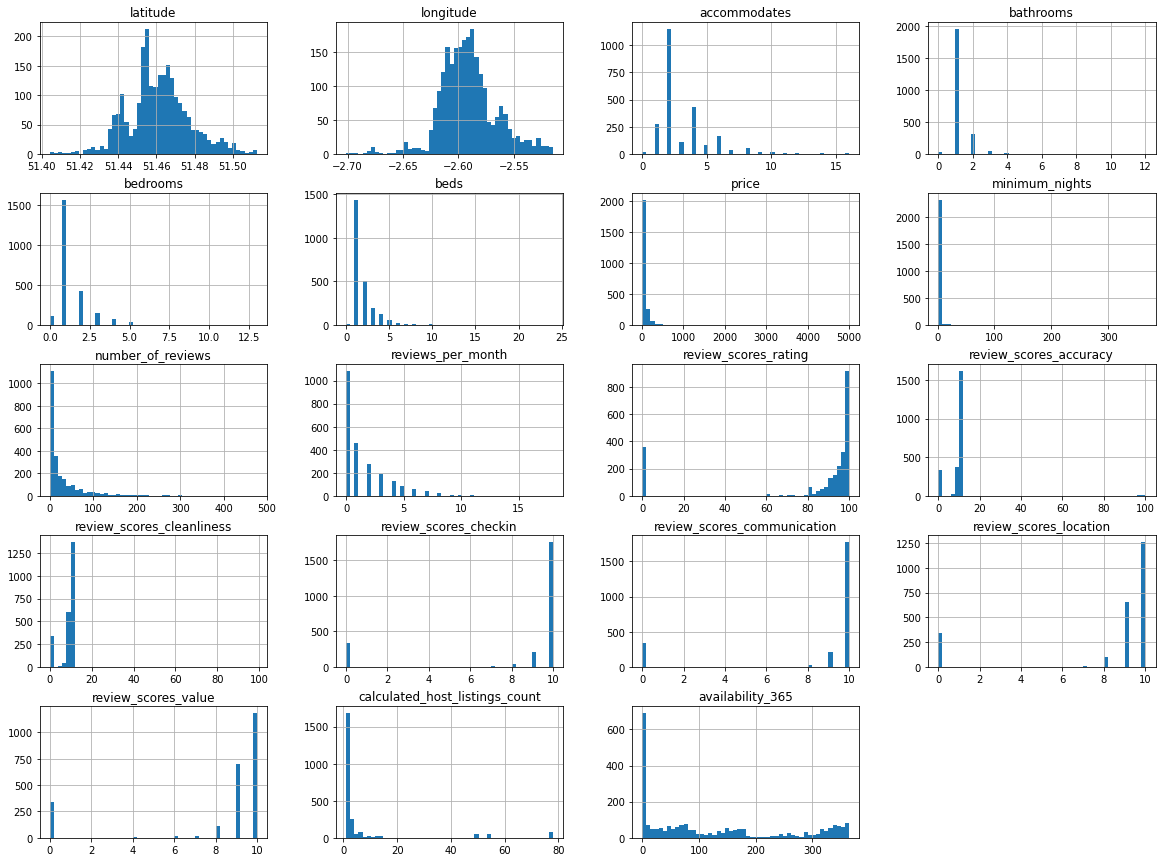

In [31]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

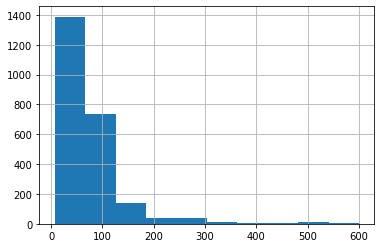

In [32]:
# drop rows where price is above 650
data = data[data.price <= 650]
data['price'].hist()
plt.show()

In [36]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=10)

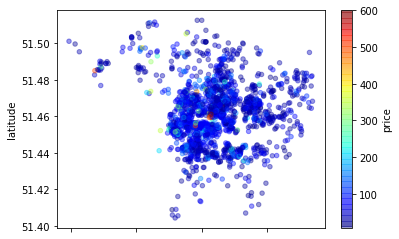

In [37]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=.4,
c="price", cmap=plt.get_cmap("jet"), colorbar=True,
)


In [38]:
corr = train.corr()
corr['price'].sort_values(ascending=False)

price                             1.000000
accommodates                      0.644340
beds                              0.617145
bedrooms                          0.596364
bathrooms                         0.425260
availability_365                  0.131786
calculated_host_listings_count    0.031430
latitude                         -0.013961
minimum_nights                   -0.017784
reviews_per_month                -0.100021
number_of_reviews                -0.103425
review_scores_accuracy           -0.106691
review_scores_cleanliness        -0.135704
review_scores_location           -0.157574
review_scores_rating             -0.162269
longitude                        -0.166688
review_scores_checkin            -0.172684
review_scores_communication      -0.173819
review_scores_value              -0.192292
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde4db2dac8>,
      dtype=object)

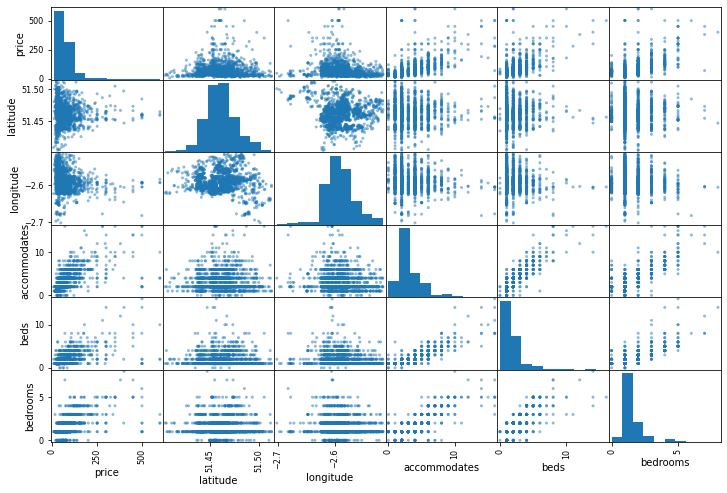

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(train[['price', 'latitude', 'longitude', 'accommodates', 'beds', 'bedrooms']], figsize=(12, 8))


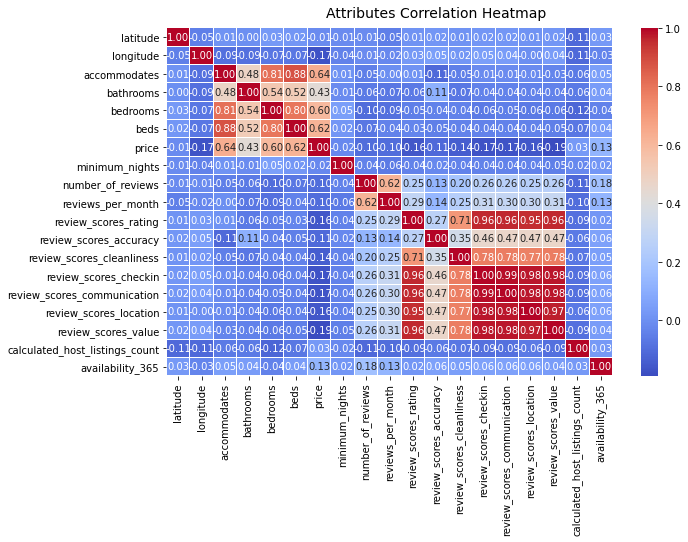

In [40]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 6))

hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

In [41]:
# disable chained assignment warning
pd.options.mode.chained_assignment = None  # default='warn'

# drop rows with missing data
train.dropna(inplace= True)
test.dropna(inplace= True)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1608 entries, 14460162 to 21108060
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   name                            1608 non-null   object  
 1   host_id                         1608 non-null   category
 2   host_name                       1608 non-null   category
 3   neighbourhood                   1608 non-null   category
 4   postcode                        1608 non-null   category
 5   latitude                        1608 non-null   float64 
 6   longitude                       1608 non-null   float64 
 7   property_type                   1608 non-null   category
 8   room_type                       1608 non-null   category
 9   accommodates                    1608 non-null   int64   
 10  bathrooms                       1608 non-null   int64   
 11  bedrooms                        1608 non-null   int64   
 12  beds     

The dataset is now clean, with 1608 training datapoints remaining.

In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# K-fold cross validation folds
K = 10

def display_scores(scores):
    print("\nRMSE on training set (", K, "-fold cross validation)")
    print("----------------------------")
    print("Values:", scores)
    print("\nMean:", scores.mean())
    print("\nStandard deviation:", scores.std())

# use only 'accommodates' as a feature
x_train = train['accommodates'].values.reshape(-1, 1)
y_train = train['price'].values.reshape(-1, 1)

# scale feature data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

regr = LinearRegression()

# evaluate on training set
print("RMSE on training set")
print("---------------------")
regr.fit(x_train, y_train)
y_preds = regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

RMSE on training set
---------------------
Value: 36.53770440330808

RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [38.01810128 42.27333715 29.30905326 31.11990294 27.68116441 39.2305868
 49.29196378 38.41349751 29.73609937 36.33437545]

Mean: 36.14080819522577

Standard deviation: 6.42886136133281


In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# use some of the highly correlated numerical attributes as features
x_train = train.drop(train.columns.difference(['accommodates', 'beds', 'bathrooms', 'availability_365']), axis=1)
y_train = train['price'].values.reshape(-1, 1)

# scale feature data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

regr = LinearRegression()

# evaluate on training set
print("RMSE on training set")
print("---------------------")
regr.fit(x_train, y_train)
y_preds = regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

RMSE on training set
---------------------
Value: 35.54667847916111

RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [37.98743641 40.7007573  29.15794276 28.74846905 27.66108479 40.03228739
 46.88313584 38.64890519 29.83818048 34.38472657]

Mean: 35.40429257664165

Standard deviation: 6.113347025530754


In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# use all numerical attributes as features
x_train = train.drop('price', axis=1).drop(train.select_dtypes(['object', 'category']), axis=1)
# scale feature data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)

regr = LinearRegression()

# evaluate on training set
print("RMSE on training set")
print("---------------------")
regr.fit(x_train, y_train)
y_preds = regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

RMSE on training set
---------------------
Value: 33.71778396701331

RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [37.66910118 37.30363591 28.71487232 28.44143055 25.65289141 39.25166614
 46.29748256 36.16369606 27.53392636 33.10812623]

Mean: 34.0136828722984

Standard deviation: 6.156087512758045


In [45]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# use all numerical attributes as features
x_train = train.drop('price', axis=1).drop(train.select_dtypes(['object', 'category']), axis=1)
y_train = train['price'].values.reshape(-1, 1)

tree_regr = DecisionTreeRegressor(max_depth=3)

# evaluate on training set
print("RMSE on training set")
print("---------------------")
tree_regr.fit(x_train, y_train)
y_preds = tree_regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(tree_regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

RMSE on training set
---------------------
Value: 33.489775803078324

RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [38.62646803 38.08801565 30.89711819 30.49954181 26.16668014 37.52948437
 53.69180954 35.09787454 33.84775819 37.20174183]

Mean: 36.164649228527566

Standard deviation: 6.972842162909533


## Model 3: Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor
    
forest_regr = RandomForestRegressor(n_estimators=100, max_depth=None)
forest_regr.fit(x_train, y_train)

# use all numerical attributes as features
x_train = train.drop('price', axis=1).drop(train.select_dtypes(['object', 'category']), axis=1)
y_train = train['price'].values.reshape(-1, 1)

# evaluate on training set
print("RMSE on training set")
print("---------------------")
forest_regr.fit(x_train, y_train)
y_preds = forest_regr.predict(x_train)
mse = mean_squared_error(y_train, y_preds)
print("Value:", np.sqrt(mse))

# evaluate (K-fold cross validation) on train set
scores = cross_val_score(forest_regr, x_train, y_train, scoring="neg_mean_squared_error", cv=K)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RMSE on training set
---------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Value: 12.667886318604793


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 


RMSE on training set ( 10 -fold cross validation)
----------------------------
Values: [37.16146246 37.06889432 28.04950505 29.09669897 23.16710079 37.26341693
 42.22704809 32.69255126 35.5727452  31.40586914]

Mean: 33.370529220333054

Standard deviation: 5.305655040075325


In [47]:
# use all numerical attributes as features
x_test = test.drop('price', axis=1).drop(train.select_dtypes(['object', 'category']), axis=1)
y_test = test['price'].values.reshape(-1, 1)

# evaluate on test set
print("RMSE on test set")
print("---------------------")
y_preds = forest_regr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
print("Value:", np.sqrt(mse))

RMSE on test set
---------------------
Value: 35.18306996200331


In [48]:
print("predicted prices:", y_preds[:18].flatten().astype(int))
print("   actual prices:", y_test[:18].flatten().astype(int))

predicted prices: [ 32  46  58  50  33 143  25  43  50  74  32  35  69 125  69  39  34  37]
   actual prices: [ 27  75  60  50  25 242  25  35  45  99  33  32  69 149  69  50  25  27]
